In [19]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# 1. Simulate ε with (at least) 104 random draws from a standard normal distribution, and simulate ν with (at least) 104 random draws from a standard uniform distribution.

In [20]:
number = 10**4

consumption_growth = np.zeros(number)

for i in range(number):
    
    epsilon = np.random.standard_normal()
    nu = np.random.uniform(0,1)
    
    if nu < 0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu )

simulated_consumption_growth = pd.DataFrame(consumption_growth, columns = ['Growth'])

simulated_consumption_growth.head()

,Growth
0,1.007579
1,1.035401
2,0.999146
3,1.006546
4,0.984364


# 2. Repeat this process for all values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ).

In [21]:
delta = 0.99
a = np.arange(1,4.1,0.1)
M = pd.DataFrame(data = None, columns = a)
for gamma in np.arange(1,4.1,0.1):
    M[gamma] = delta * simulated_consumption_growth **(-gamma)
M

,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0
0,0.982554,0.981812,0.981071,0.980331,0.979591,0.978852,0.978113,0.977375,0.976637,0.975900,...,0.967098,0.966368,0.965639,0.964910,0.964182,0.963454,0.962727,0.962001,0.961274,0.960549
1,0.956151,0.952831,0.949522,0.946224,0.942938,0.939664,0.936400,0.933148,0.929908,0.926678,...,0.888789,0.885702,0.882626,0.879561,0.876507,0.873463,0.870429,0.867407,0.864394,0.861392
2,0.990846,0.990931,0.991015,0.991100,0.991185,0.991269,0.991354,0.991439,0.991523,0.991608,...,0.992625,0.992710,0.992794,0.992879,0.992964,0.993049,0.993134,0.993218,0.993303,0.993388
3,0.983562,0.982920,0.982279,0.981639,0.980998,0.980359,0.979719,0.979080,0.978442,0.977804,...,0.970178,0.969545,0.968913,0.968281,0.967649,0.967018,0.966388,0.965757,0.965127,0.964498
4,1.005726,1.007312,1.008901,1.010492,1.012086,1.013682,1.015281,1.016882,1.018486,1.020093,...,1.039568,1.041208,1.042850,1.044495,1.046142,1.047792,1.049445,1.051100,1.052758,1.054418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.957688,0.954516,0.951353,0.948202,0.945061,0.941930,0.938809,0.935699,0.932600,0.929510,...,0.893225,0.890266,0.887317,0.884377,0.881447,0.878527,0.875617,0.872716,0.869825,0.866944
9996,0.955084,0.951661,0.948250,0.944851,0.941465,0.938091,0.934728,0.931378,0.928040,0.924714,...,0.885717,0.882543,0.879379,0.876228,0.873087,0.869958,0.866840,0.863733,0.860637,0.857553
9997,0.950674,0.946828,0.942998,0.939183,0.935384,0.931600,0.927832,0.924078,0.920340,0.916617,...,0.873099,0.869567,0.866050,0.862546,0.859057,0.855582,0.852121,0.848674,0.845241,0.841822
9998,0.948839,0.944819,0.940815,0.936828,0.932858,0.928905,0.924969,0.921049,0.917146,0.913260,...,0.867887,0.864210,0.860548,0.856901,0.853270,0.849654,0.846054,0.842468,0.838898,0.835344


# 3. Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

In [22]:
M_mean = pd.DataFrame(M.mean(axis = 0), columns = ['Mean'])
M_mean.head()

,Mean
1.0,0.978748
1.1,0.977856
1.2,0.977013
1.3,0.976220
1.4,0.975479


In [23]:
M_std = pd.DataFrame(M.std(axis = 0), columns = ['Standard_Deviation'])

M_std.head()

,Standard_Deviation
1.0,0.067565
1.1,0.075791
1.2,0.084336
1.3,0.093212
1.4,0.102437


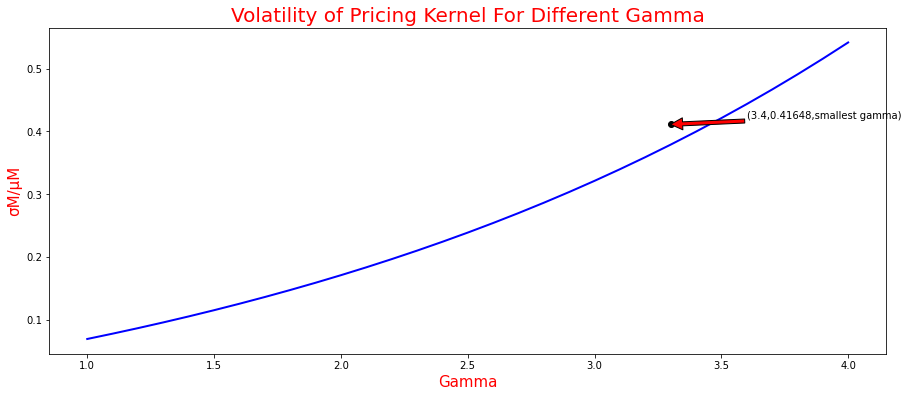

In [24]:
x = np.arange(1,4.1,0.1)

y = M_std.values/M_mean.values

plt.figure(figsize = (15,6))

plt.xlabel('Gamma', fontsize = 15, color = 'r')

plt.ylabel('σM/μM', fontsize = 15, color = 'r')

plt.title('Volatility of Pricing Kernel For Different Gamma', fontsize = 20, color = 'r')

plt.plot(smallest_gamma,lowest_volatility, marker = 'o', color = 'k' )

plt.annotate('(3.4,0.41648,smallest gamma)',xy = (smallest_gamma,lowest_volatility), xytext = (3.6,0.42), arrowprops = dict(facecolor = 'red',edgecolor = 'black'))

plt.plot(x,y, color = 'b', linewidth = 2)

plt.show()

# 4. Find the smallest value of γ (in your data) for which σM/μM > 0.4, so that the Hansen–Jagannathan bound is satisfied.

In [25]:
gamma = pd.DataFrame(np.arange(1,4.1,0.1), columns = ['Gamma'])

Pricing_Kernel_Volatility = pd.DataFrame(M_std.values/M_mean.values,columns = ['Volatility'])

combined_data = pd.concat([gamma,Pricing_Kernel_Volatility], axis = 1)

combined_data.head()

,Gamma,Volatility
0,1.0,0.069032
1,1.1,0.077508
2,1.2,0.086320
3,1.3,0.095483
4,1.4,0.105012


In [26]:
smallest_gamma = combined_data[combined_data['Volatility']>0.4].iloc[0,0]

smallest_gamma

3.500000000000002

In [27]:
combined_data[combined_data['Volatility']>0.4]

,Gamma,Volatility
25,3.5,0.421250
26,3.6,0.443627
27,3.7,0.466856
28,3.8,0.490965
29,3.9,0.515982
30,4.0,0.541935


In [28]:
lowest_volatility = combined_data[combined_data['Volatility']>0.4].iloc[0,1]

lowest_volatility

0.42125021534308854

#  5.Explain the economic significance of this result.

### After we incoprated the rare disaster of nu, the gamma is much smaller than that without rare disaster factor. Now, the gamma which represents the relative risk aversion is much more acceptable for a person. 